In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *


In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
from utils.root_tools import tset

Welcome to JupyROOT 6.24/06


In [6]:
import ROOT 
tf = ROOT.TFile("/uscms_data/d3/ekoenig/8BAnalysis/analysis/CMSSW_10_6_28/src/MultiHiggs/analysis/MultiHAnalysis/btageff_8b_2018.root")

In [14]:
list(map(lambda k : k.GetName(), tf.Get("qcd").GetListOfKeys()))

['loose_n_jet',
 'loose_ht_jet',
 'loose_jet_btag',
 'loose_jet_pt',
 'loose_jet_eta',
 'loose_jet_pt_eta',
 'loose_hf0_n_jet',
 'loose_hf0_ht_jet',
 'loose_hf0_jet_btag',
 'loose_hf0_jet_pt',
 'loose_hf0_jet_eta',
 'loose_hf0_jet_pt_eta',
 'loose_hf4_n_jet',
 'loose_hf4_ht_jet',
 'loose_hf4_jet_btag',
 'loose_hf4_jet_pt',
 'loose_hf4_jet_eta',
 'loose_hf4_jet_pt_eta',
 'loose_hf5_n_jet',
 'loose_hf5_ht_jet',
 'loose_hf5_jet_btag',
 'loose_hf5_jet_pt',
 'loose_hf5_jet_eta',
 'loose_hf5_jet_pt_eta',
 'medium_n_jet',
 'medium_ht_jet',
 'medium_jet_btag',
 'medium_jet_pt',
 'medium_jet_eta',
 'medium_jet_pt_eta',
 'medium_hf0_n_jet',
 'medium_hf0_ht_jet',
 'medium_hf0_jet_btag',
 'medium_hf0_jet_pt',
 'medium_hf0_jet_eta',
 'medium_hf0_jet_pt_eta',
 'medium_hf4_n_jet',
 'medium_hf4_ht_jet',
 'medium_hf4_jet_btag',
 'medium_hf4_jet_pt',
 'medium_hf4_jet_eta',
 'medium_hf4_jet_pt_eta',
 'medium_hf5_n_jet',
 'medium_hf5_ht_jet',
 'medium_hf5_jet_btag',
 'medium_hf5_jet_pt',
 'medium_hf5_jet_

In [69]:
qcd = tf.Get("qcd")
ttbar = tf.Get("ttbar")
effi = tf.Get("eff")

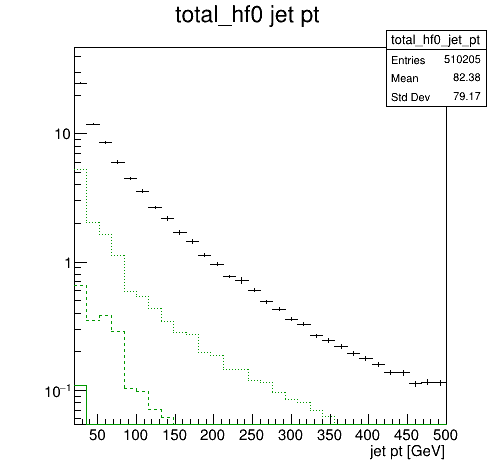

In [92]:
canvas = tset(
    ROOT.TCanvas("","",500,500),
    LeftMargin=0.15,
    Logy=True,
)

total = tset(
    qcd.Get("total_hf0_jet_pt"),
    LineColor=ROOT.kBlack,
    MarkerStyle=1,
)
total.Draw()

for i, wp in enumerate(wplabels[1:][::-1]):
        
    tset(
        qcd.Get(f"{wp}_hf0_jet_pt"),
        LineColor=ROOT.kGreen+2,
        LineStyle=i+1,
        # MarkerStyle=1,
    ).Draw("hist same")

ROOT.gPad.Draw()

Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


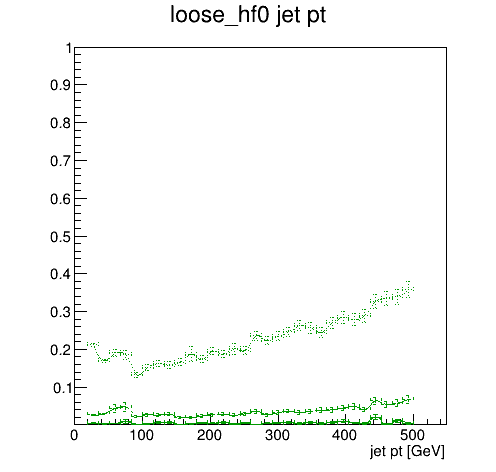

In [84]:
canvas = tset(
    ROOT.TCanvas("","",500,500),
    LeftMargin=0.15,
)

h = tset(
    effi.Get(f"loose_hf0_jet_pt"),
    LineColor=ROOT.kGreen+2,
    LineStyle=3,
    # MarkerStyle=1,
)

h.Draw("ACP")

canvas.Update()
tset(h.GetPaintedGraph(),Maximum=1, Minimum=0.5e-3)

tset(
    effi.Get(f"medium_hf0_jet_pt"),
    LineColor=ROOT.kGreen+2,
    LineStyle=2,
    # MarkerStyle=1,
).Draw("CP same")

tset(
    effi.Get(f"tight_hf0_jet_pt"),
    LineColor=ROOT.kGreen+2,
    LineStyle=1,
    # MarkerStyle=1,
).Draw("CP same")
        

ROOT.gPad.Draw()

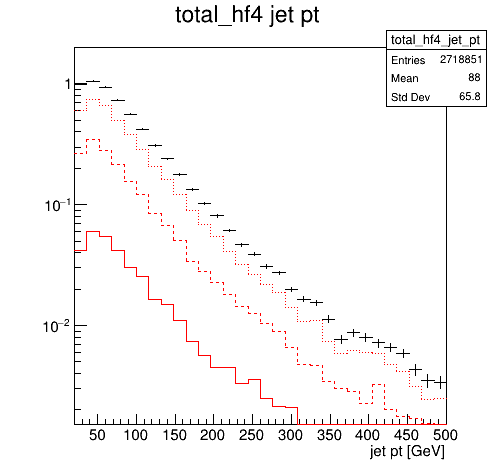

In [91]:
canvas = tset(
    ROOT.TCanvas("","",500,500),
    LeftMargin=0.15,
    Logy=True,
)

total = tset(
    ttbar.Get("total_hf4_jet_pt"),
    LineColor=ROOT.kBlack,
    MarkerStyle=1,
)
total.Draw("P")

for i, wp in enumerate(wplabels[1:][::-1]):
        
    tset(
        ttbar.Get(f"{wp}_hf4_jet_pt"),
        LineColor=ROOT.kRed,
        LineStyle=i+1,
        # MarkerStyle=1,
    ).Draw("hist same")

ROOT.gPad.Draw()

Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


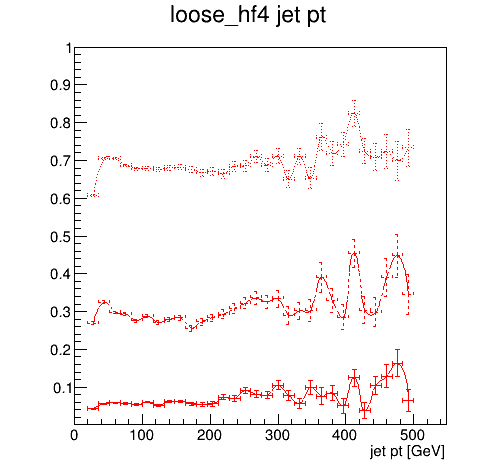

In [85]:
canvas = tset(
    ROOT.TCanvas("","",500,500),
    LeftMargin=0.15,
)

h = tset(
    effi.Get(f"loose_hf4_jet_pt"),
    LineColor=ROOT.kRed,
    LineStyle=3,
    # MarkerStyle=1,
)

h.Draw("ACP")

canvas.Update()
tset(h.GetPaintedGraph(),Maximum=1, Minimum=0.5e-3)

tset(
    effi.Get(f"medium_hf4_jet_pt"),
    LineColor=ROOT.kRed,
    LineStyle=2,
    # MarkerStyle=1,
).Draw("CP same")

tset(
    effi.Get(f"tight_hf4_jet_pt"),
    LineColor=ROOT.kRed,
    LineStyle=1,
    # MarkerStyle=1,
).Draw("CP same")
        

ROOT.gPad.Draw()

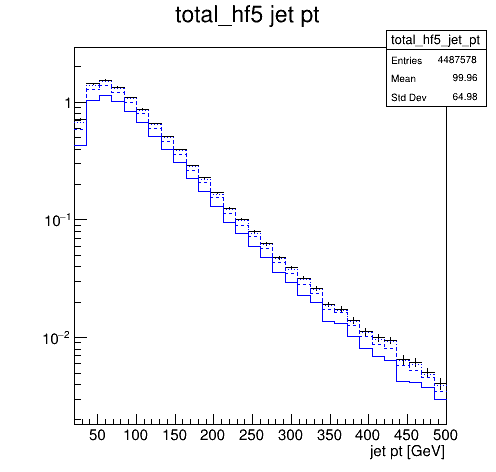

In [90]:
canvas = tset(
    ROOT.TCanvas("","",500,500),
    LeftMargin=0.15,
    Logy=True,
)

total = tset(
    ttbar.Get("total_hf5_jet_pt"),
    LineColor=ROOT.kBlack,
    MarkerStyle=1,
)
total.Draw()

for i, wp in enumerate(wplabels[1:][::-1]):
        
    tset(
        ttbar.Get(f"{wp}_hf5_jet_pt"),
        LineColor=ROOT.kBlue,
        LineStyle=i+1,
        # MarkerStyle=1,
    ).Draw("hist same")

ROOT.gPad.Draw()

Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


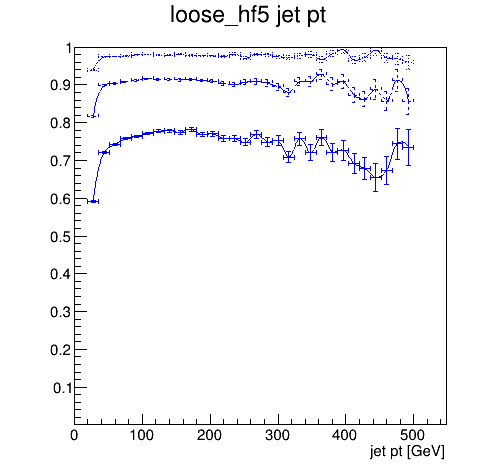

In [86]:
canvas = tset(
    ROOT.TCanvas("","",500,500),
    LeftMargin=0.15,
)

h = tset(
    effi.Get(f"loose_hf5_jet_pt"),
    LineColor=ROOT.kBlue,
    LineStyle=3,
    # MarkerStyle=1,
)

h.Draw("ACP")

canvas.Update()
tset(h.GetPaintedGraph(),Maximum=1, Minimum=0.5e-3)

tset(
    effi.Get(f"medium_hf5_jet_pt"),
    LineColor=ROOT.kBlue,
    LineStyle=2,
    # MarkerStyle=1,
).Draw("CP same")

tset(
    effi.Get(f"tight_hf5_jet_pt"),
    LineColor=ROOT.kBlue,
    LineStyle=1,
    # MarkerStyle=1,
).Draw("CP same")
        

ROOT.gPad.Draw()